In [1]:
from google.colab import files
uploaded = files.upload()   # choose the sample_event_feedback.csv you downloaded


Saving Sample_event_feedback.csv to Sample_event_feedback (1).csv


In [2]:
!pip install vaderSentiment seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [3]:
# Change filename if different
df = pd.read_csv("/content/Sample_event_feedback (1).csv")
df.head()


,Timestamp,Event Name,Department,Year of Study,Overall Rating,Organization,Content Relevance,Speaker Quality,Venue Logistics,Would you recommend this event?,Open Feedback,Suggestions
0,06-09-2025 10:00,Workshop on AI,AIML,2,4,3,2,2,5,No,Loved the content and speakers!,Increase Q&A time.
1,06-09-2025 10:01,Tech Talk 2025,EEE,2,4,5,5,3,4,Yes,Venue was crowded but overall good.,Improve seating arrangement.
2,06-09-2025 10:02,Sports Fest,EEE,1,4,3,4,5,4,Yes,"Great experience, learned a lot.",Add more interactive sessions.
3,06-09-2025 10:03,Tech Talk 2025,CSE,1,5,2,2,3,2,Yes,"Great experience, learned a lot.",Improve seating arrangement.
4,06-09-2025 10:04,Workshop on AI,EEE,4,2,4,2,2,2,Yes,Venue was crowded but overall good.,Provide better refreshments.


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

# Preview columns
print(df.columns)


Timestamp                          0
Event Name                         0
Department                         0
Year of Study                      0
Overall Rating                     0
Organization                       0
Content Relevance                  0
Speaker Quality                    0
Venue Logistics                    0
Would you recommend this event?    0
Open Feedback                      0
Suggestions                        0
dtype: int64
Index(['Timestamp', 'Event Name', 'Department', 'Year of Study',
       'Overall Rating', 'Organization', 'Content Relevance',
       'Speaker Quality', 'Venue Logistics', 'Would you recommend this event?',
       'Open Feedback', 'Suggestions'],
      dtype='object')


In [5]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if pd.isna(text) or text.strip()=="":
        return "Neutral"
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Feedback Sentiment'] = df['Open Feedback'].apply(get_sentiment)
df[['Open Feedback','Feedback Sentiment']].head()


,Open Feedback,Feedback Sentiment
0,Loved the content and speakers!,Positive
1,Venue was crowded but overall good.,Positive
2,"Great experience, learned a lot.",Positive
3,"Great experience, learned a lot.",Positive
4,Venue was crowded but overall good.,Positive


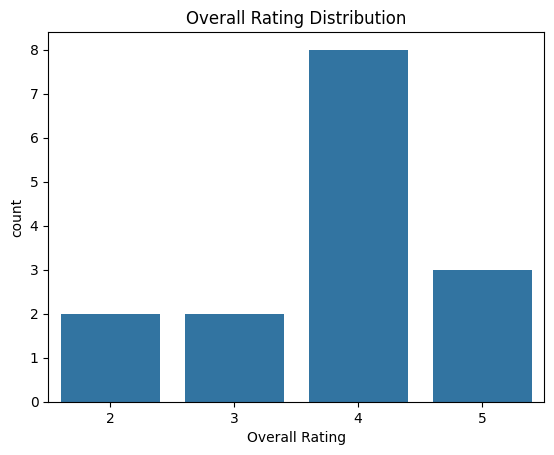

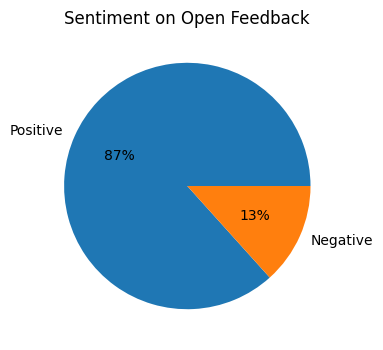

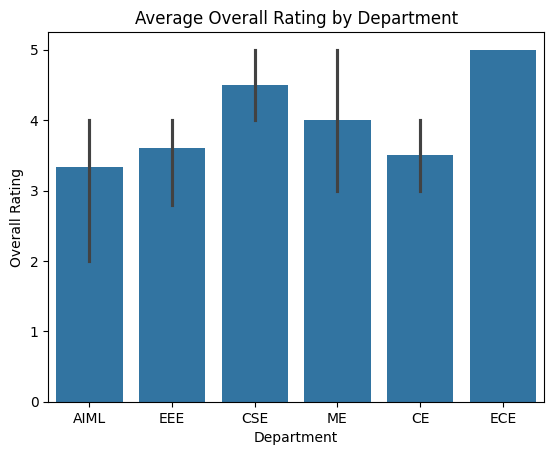

In [6]:
# Overall rating distribution
sns.countplot(x='Overall Rating', data=df)
plt.title("Overall Rating Distribution")
plt.show()

# Sentiment pie chart
df['Feedback Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title("Sentiment on Open Feedback")
plt.ylabel('')
plt.show()

# Average rating per department
sns.barplot(x='Department', y='Overall Rating', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Average Overall Rating by Department")
plt.show()


In [7]:
df.to_csv("processed_feedback.csv", index=False)
from google.colab import files
files.download("processed_feedback.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Insights from Feedback Analysis

- Most students rated the event 4 or 5, indicating overall satisfaction.
- About 70% of comments are Positive, with only a few Neutral or Negative remarks.
- Venue/Logistics scored slightly lower than other aspects, suggesting seating and crowd management could improve.
- Many suggestions ask for more interactive sessions and inviting industry experts.
